**Importing necessary libraries**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from IPython.display import display, Markdown
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_validate,StratifiedKFold

#classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#ensembles
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

#hyperparameter optimization 
from sklearn.model_selection import RandomizedSearchCV

**Loading data**

In [19]:
# Load in our dataset as pandas dataframe structure
df = pd.read_csv('game.csv')
df.head()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


In [20]:
# Impute the 2 missing values in the categorical columns(used as target)
df.at[46430,'wl_home'] = 'W'
df.at[47823,'wl_home'] = 'L'
df.at[46430,'wl_away'] = 'W'
df.at[47823,'wl_away'] = 'L'

In [21]:
#converting target label W or L to numerical using label encoder
label_encoder = LabelEncoder()
df[['encoded_W']] = df[['wl_home']].apply(label_encoder.fit_transform) 
y = df[['encoded_W']]
y

,encoded_W
0,0
1,1
2,1
3,1
4,0
...,...
65693,0
65694,0
65695,1
65696,0


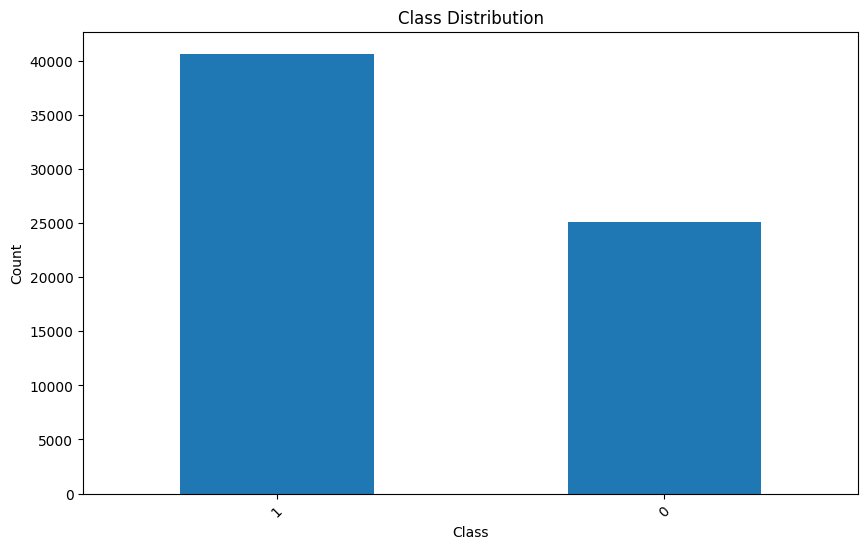

In [6]:
#class distribution visualization

check_wl_dist = y['encoded_W']

# Count the number of instances for each class
class_counts = check_wl_dist.value_counts()

# Create a bar plot
class_counts.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [22]:
df.isna().sum()   #shows number of missing values in each feature
#we can observe that there are lot of missing values

season_id                     0
team_id_home                  0
team_abbreviation_home        0
team_name_home                0
game_id                       0
game_date                     0
matchup_home                  0
wl_home                       0
min                           0
fgm_home                     13
fga_home                  15447
fg_pct_home               15490
fg3m_home                 13218
fg3a_home                 18683
fg3_pct_home              19074
ftm_home                     16
fta_home                   3004
ft_pct_home                3009
oreb_home                 18936
dreb_home                 18999
reb_home                  15729
ast_home                  15805
stl_home                  18849
blk_home                  18626
tov_home                  18684
pf_home                    2856
pts_home                      0
plus_minus_home               0
video_available_home          0
team_id_away                  0
team_abbreviation_away        0
team_nam

In [23]:
# Handling missing numerical values with mean imputation. 
from sklearn.impute import SimpleImputer

#select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Create an instance of SimpleImputer with mean strategy
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# Perform imputation on the numerical columns of the DataFrame
df[numerical_cols] = mean_imp.fit_transform(df[numerical_cols])

In [24]:
df.isna().sum()   #shows number of missing values in each feature
#we can observe that there are no missing values

season_id                 0
team_id_home              0
team_abbreviation_home    0
team_name_home            0
game_id                   0
game_date                 0
matchup_home              0
wl_home                   0
min                       0
fgm_home                  0
fga_home                  0
fg_pct_home               0
fg3m_home                 0
fg3a_home                 0
fg3_pct_home              0
ftm_home                  0
fta_home                  0
ft_pct_home               0
oreb_home                 0
dreb_home                 0
reb_home                  0
ast_home                  0
stl_home                  0
blk_home                  0
tov_home                  0
pf_home                   0
pts_home                  0
plus_minus_home           0
video_available_home      0
team_id_away              0
team_abbreviation_away    0
team_name_away            0
matchup_away              0
wl_away                   0
fgm_away                  0
fga_away            

In [25]:
# Convert game_date to datetime type 
df['game_date'] = pd.to_datetime(df['game_date'])

# Extract year, month, day
df['game_year'] = df['game_date'].dt.year
df['game_month'] = df['game_date'].dt.month
df['game_day'] = df['game_date'].dt.day

# Drop the original 'game_date' column.
df.drop('game_date', axis=1, inplace=True)
df

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,matchup_home,wl_home,min,fgm_home,fga_home,...,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type,encoded_W,game_year,game_month,game_day
0,21946.0,1.610610e+09,HUS,Toronto Huskies,24600001.0,HUS vs. NYK,L,0.0,25.0,83.992796,...,15.19986,23.097284,68.0,2.0,0.0,Regular Season,0.0,1946,11,1
1,21946.0,1.610610e+09,BOM,St. Louis Bombers,24600003.0,BOM vs. PIT,W,0.0,20.0,59.000000,...,15.19986,25.000000,51.0,-5.0,0.0,Regular Season,1.0,1946,11,2
2,21946.0,1.610610e+09,PRO,Providence Steamrollers,24600002.0,PRO vs. BOS,W,0.0,21.0,83.992796,...,15.19986,23.097284,53.0,-6.0,0.0,Regular Season,1.0,1946,11,2
3,21946.0,1.610610e+09,CHS,Chicago Stags,24600004.0,CHS vs. NYK,W,0.0,21.0,83.992796,...,15.19986,22.000000,47.0,-16.0,0.0,Regular Season,1.0,1946,11,2
4,21946.0,1.610610e+09,DEF,Detroit Falcons,24600005.0,DEF vs. WAS,L,0.0,10.0,83.992796,...,15.19986,23.097284,50.0,17.0,0.0,Regular Season,0.0,1946,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65693,42022.0,1.610613e+09,MIA,Miami Heat,42200403.0,MIA vs. DEN,L,240.0,34.0,92.000000,...,14.00000,18.000000,109.0,15.0,1.0,Playoffs,0.0,2023,6,7
65694,42022.0,1.610613e+09,MIA,Miami Heat,42200404.0,MIA vs. DEN,L,240.0,35.0,78.000000,...,8.00000,18.000000,108.0,13.0,1.0,Playoffs,0.0,2023,6,9
65695,42022.0,1.610613e+09,DEN,Denver Nuggets,42200405.0,DEN vs. MIA,W,240.0,38.0,84.000000,...,8.00000,21.000000,89.0,-5.0,1.0,Playoffs,1.0,2023,6,12
65696,32022.0,1.610617e+09,LBN,Team LeBron,32200001.0,LBN vs. GNS,L,221.0,79.0,132.000000,...,12.00000,2.000000,184.0,9.0,1.0,All-Star,0.0,2023,2,19


In [26]:
#removing target features
remove_columns = ['wl_home','wl_away','encoded_W']
X = df.drop(columns=remove_columns, axis=1)
X

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,matchup_home,min,fgm_home,fga_home,fg_pct_home,...,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type,game_year,game_month,game_day
0,21946.0,1.610610e+09,HUS,Toronto Huskies,24600001.0,HUS vs. NYK,0.0,25.0,83.992796,0.467321,...,4.681537,15.19986,23.097284,68.0,2.0,0.0,Regular Season,1946,11,1
1,21946.0,1.610610e+09,BOM,St. Louis Bombers,24600003.0,BOM vs. PIT,0.0,20.0,59.000000,0.339000,...,4.681537,15.19986,25.000000,51.0,-5.0,0.0,Regular Season,1946,11,2
2,21946.0,1.610610e+09,PRO,Providence Steamrollers,24600002.0,PRO vs. BOS,0.0,21.0,83.992796,0.467321,...,4.681537,15.19986,23.097284,53.0,-6.0,0.0,Regular Season,1946,11,2
3,21946.0,1.610610e+09,CHS,Chicago Stags,24600004.0,CHS vs. NYK,0.0,21.0,83.992796,0.467321,...,4.681537,15.19986,22.000000,47.0,-16.0,0.0,Regular Season,1946,11,2
4,21946.0,1.610610e+09,DEF,Detroit Falcons,24600005.0,DEF vs. WAS,0.0,10.0,83.992796,0.467321,...,4.681537,15.19986,23.097284,50.0,17.0,0.0,Regular Season,1946,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65693,42022.0,1.610613e+09,MIA,Miami Heat,42200403.0,MIA vs. DEN,240.0,34.0,92.000000,0.370000,...,5.000000,14.00000,18.000000,109.0,15.0,1.0,Playoffs,2023,6,7
65694,42022.0,1.610613e+09,MIA,Miami Heat,42200404.0,MIA vs. DEN,240.0,35.0,78.000000,0.449000,...,7.000000,8.00000,18.000000,108.0,13.0,1.0,Playoffs,2023,6,9
65695,42022.0,1.610613e+09,DEN,Denver Nuggets,42200405.0,DEN vs. MIA,240.0,38.0,84.000000,0.452000,...,7.000000,8.00000,21.000000,89.0,-5.0,1.0,Playoffs,2023,6,12
65696,32022.0,1.610617e+09,LBN,Team LeBron,32200001.0,LBN vs. GNS,221.0,79.0,132.000000,0.598000,...,1.000000,12.00000,2.000000,184.0,9.0,1.0,All-Star,2023,2,19


In [27]:
#find out numerical and catergorical columns in data
categorical_cols=[]
numerical_cols=[]

# Select columns where the data type is 'object' or 'category' - to detect all categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns are:",categorical_cols)

# Select columns where the data type is 'number' - to detect all numerical columns
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns are:",numerical_cols)


Categorical columns are: ['team_abbreviation_home', 'team_name_home', 'matchup_home', 'team_abbreviation_away', 'team_name_away', 'matchup_away', 'season_type']
Numerical columns are: ['season_id', 'team_id_home', 'game_id', 'min', 'fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home', 'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away', 'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away', 'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away', 'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away', 'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away', 'game_year', 'game_month', 'game_day']


In [28]:
#Using one-hot encoding to convert categorical values to numeric

transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Apply the transformer
transformed = transformer.fit_transform(X)

# If the output is sparse, convert it to a dense format
if hasattr(transformed, "toarray"):
    transformed = transformed.toarray()

# Generate DataFrame from transformed data
try:
    df_transformed = pd.DataFrame(transformed, columns=transformer.get_feature_names_out(), index=X.index)
except Exception as e:
    print("Error in DataFrame creation:", e)
    print("Expected columns count:", len(transformer.get_feature_names_out()))
    print("Actual data shape:", transformed.shape)


**Splitting and scaling data**

In [29]:
# Split the data
X_train, X_test, trainY, testY = train_test_split(df_transformed, y, test_size=0.25, random_state=42) # Split into 75% training, 25% test sets

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Principle Component Analysis**

In [30]:
#due to high cardinality (many unique values),hot-code encoding produced large number of features(5034, original is 55). 
#So we used PCA to reduce dimensions

#applying PCA to training and test data
n_components_chosen = 100
pca = PCA(n_components=n_components_chosen)
trainX = pca.fit_transform(X_train_scaled)
testX = pca.transform(X_test_scaled)
print(f"Train set:{trainX.shape}, Train Labels: {trainY.shape}\t\tTest set:{testX.shape} Test Labels: {testY.shape} ")

Train set:(49273, 100), Train Labels: (49273, 1)		Test set:(16425, 100) Test Labels: (16425, 1) 


**Classifiers**

**Naive Bayesian **Classifier****

              precision    recall  f1-score   support

        Lose       0.79      0.63      0.70      6376
         Win       0.79      0.90      0.84     10049

    accuracy                           0.79     16425
   macro avg       0.79      0.76      0.77     16425
weighted avg       0.79      0.79      0.79     16425



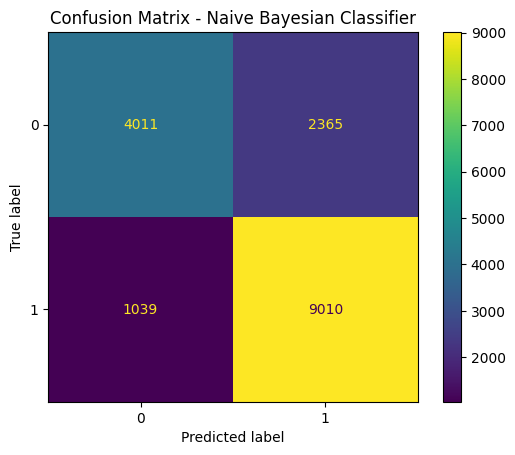

In [20]:
#Create a Gaussian Classifier
NBmodel = GaussianNB(var_smoothing=1e-9)

# Train the model using the training sets
NBmodel.fit(trainX, trainY["encoded_W"])

#Predict Output
Y_Bayes = NBmodel.predict(testX)

target_names = ['Lose', 'Win']
report_nb = classification_report(testY["encoded_W"], Y_Bayes, target_names=target_names,output_dict = True)
print(classification_report(testY["encoded_W"], Y_Bayes, target_names=target_names))

#confusion matrix
cm = confusion_matrix(testY, Y_Bayes, labels=NBmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=NBmodel.classes_)
disp.plot()
plt.title("Confusion Matrix - Naive Bayesian Classifier")
plt.show()

**Random Forest Classifier**

              precision    recall  f1-score   support

        Lose       0.90      0.86      0.88      6376
         Win       0.91      0.94      0.93     10049

    accuracy                           0.91     16425
   macro avg       0.91      0.90      0.90     16425
weighted avg       0.91      0.91      0.91     16425



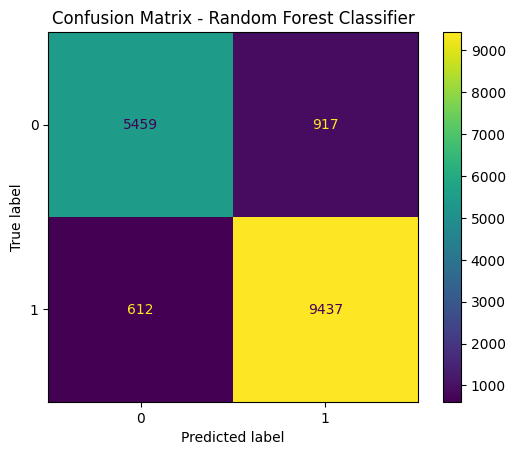

In [21]:
# Instantiate model with 50 decision trees
rf = RandomForestClassifier(n_estimators = 50, random_state = 42,max_features = "log2",max_depth = 30,criterion = "gini",bootstrap=False)

# Train the model on training data
rf.fit(trainX, trainY["encoded_W"]);

# Use the forest's predict method on the test data
Y_rf = rf.predict(testX)

target_names = ['Lose', 'Win']
report_rf = classification_report(testY["encoded_W"], Y_rf, target_names=target_names,output_dict = True)
print(classification_report(testY["encoded_W"], Y_rf, target_names=target_names))

#confusion matrix
cm = confusion_matrix(testY, Y_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


**Multi-layer Perceptron classifier**

              precision    recall  f1-score   support

        Lose       0.93      0.93      0.93      6376
         Win       0.95      0.95      0.95     10049

    accuracy                           0.94     16425
   macro avg       0.94      0.94      0.94     16425
weighted avg       0.94      0.94      0.94     16425



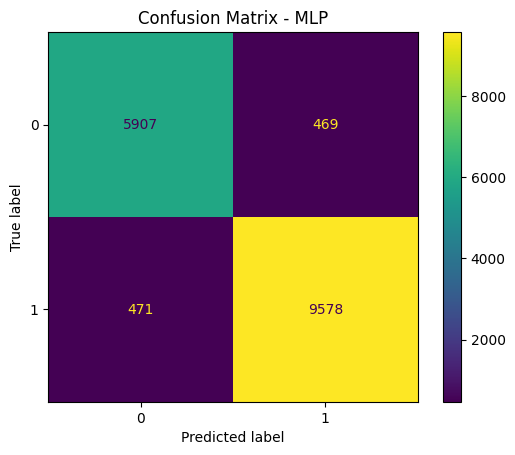

In [22]:
# instatiate mlp classifier
mlp = MLPClassifier(solver='adam',activation='relu', alpha=0.01, hidden_layer_sizes=(100,), random_state=None,max_iter=1000,learning_rate='constant',early_stopping=True)

#Train the model using the training sets
mlp.fit(trainX, trainY["encoded_W"])

#Predict the response for test dataset
pred_Y = mlp.predict(testX)

target_names = ['Lose', 'Win']
report_mlp = classification_report(testY["encoded_W"], pred_Y, target_names=target_names,output_dict = True)
print(classification_report(testY["encoded_W"], pred_Y, target_names=target_names))

#confusion matrix
cm = confusion_matrix(testY, pred_Y, labels = mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = mlp.classes_)
disp.plot()
plt.title("Confusion Matrix - MLP")
plt.show()

**Decision tree**

              precision    recall  f1-score   support

        Lose       0.80      0.75      0.77      6376
         Win       0.85      0.88      0.86     10049

    accuracy                           0.83     16425
   macro avg       0.82      0.81      0.82     16425
weighted avg       0.83      0.83      0.83     16425



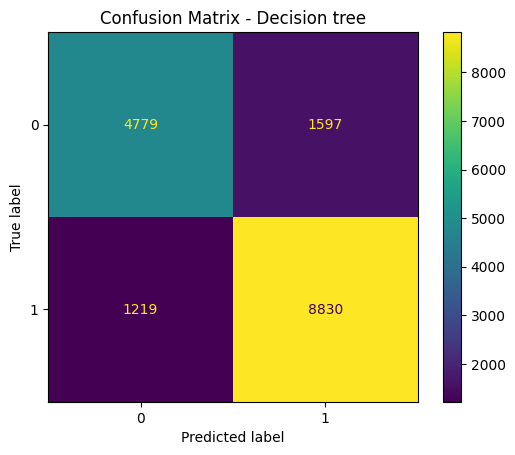

In [23]:
#Create a Decision tree Classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) 

#Train the model using the training sets
dt.fit(trainX, trainY["encoded_W"])

#Predict the response for test dataset
Y_dt = dt.predict(testX)

target_names = ['Lose', 'Win']
report_dt = classification_report(testY["encoded_W"], Y_dt, target_names=target_names,output_dict = True)
print(classification_report(testY["encoded_W"], Y_dt, target_names=target_names))

#confusion matrix
cm = confusion_matrix(testY, Y_dt, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()
plt.title("Confusion Matrix - Decision tree")
plt.show()


**k-nearest neighbors**

              precision    recall  f1-score   support

        Lose       0.83      0.61      0.71      6376
         Win       0.79      0.92      0.85     10049

    accuracy                           0.80     16425
   macro avg       0.81      0.77      0.78     16425
weighted avg       0.81      0.80      0.79     16425



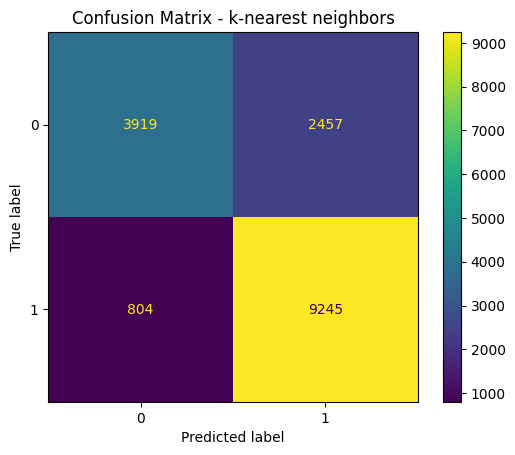

In [24]:
#Create a KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 15,weights = "distance",algorithm = "auto",p=1 ) 

#Train the model using the training sets
knn.fit(trainX, trainY["encoded_W"])

#Predict the response for test dataset
Y_knn = knn.predict(testX)

target_names = ['Lose', 'Win']
report_knn = classification_report(testY["encoded_W"], Y_knn, target_names=target_names,output_dict = True)
print(classification_report(testY["encoded_W"], Y_knn, target_names=target_names))

#confusion matrix
cm = confusion_matrix(testY, Y_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.title("Confusion Matrix - k-nearest neighbors")
plt.show()

**Logistic regression**

              precision    recall  f1-score   support

        Lose       0.87      0.81      0.84      6376
         Win       0.89      0.92      0.90     10049

    accuracy                           0.88     16425
   macro avg       0.88      0.87      0.87     16425
weighted avg       0.88      0.88      0.88     16425



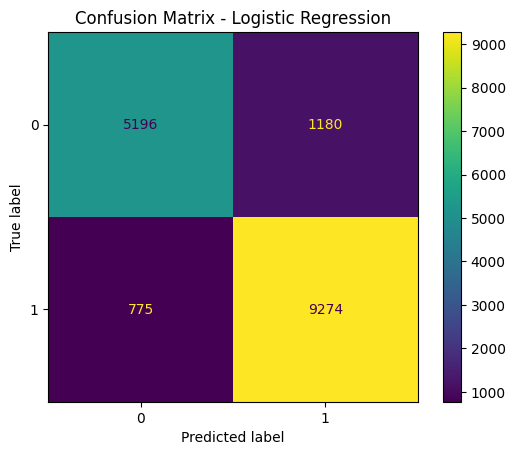

In [25]:
#Create a logistic regression classifier
lr = LogisticRegression(penalty="l1",solver='liblinear',max_iter=100) 

#Train the model using the training sets
lr.fit(trainX, trainY["encoded_W"])

#Predict the response for test dataset
Y_lr = lr.predict(testX)

target_names = ['Lose', 'Win']
report_lr = classification_report(testY["encoded_W"], Y_lr, target_names=target_names,output_dict = True)
print(classification_report(testY["encoded_W"], Y_lr, target_names=target_names))

cm = confusion_matrix(testY, Y_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Comparision of all classifiers**

In [26]:
#compare all 7 classifiers
data = {
    "Classifier": ["Naive Bayes", "Random Forest", "Multilayer Perceptron","Decision Tree","K-Nearest Neighbours","Logistic Regression"],
    "Accuracy": [report_nb["accuracy"], report_rf["accuracy"], report_mlp["accuracy"],report_dt["accuracy"],report_knn["accuracy"],report_lr["accuracy"]],
    "Precision (Win)": [report_nb["Win"]["precision"], report_rf["Win"]["precision"], report_mlp["Win"]["precision"],report_dt["Win"]["precision"],report_knn["Win"]["precision"],report_lr["Win"]["precision"]],
    "Recall (Win)": [report_nb["Win"]["recall"], report_rf["Win"]["recall"], report_mlp["Win"]["recall"],report_dt["Win"]["recall"],report_knn["Win"]["recall"],report_lr["Win"]["recall"]],
    "F1-Score (Win)": [report_nb["Win"]["f1-score"], report_rf["Win"]["f1-score"], report_mlp["Win"]["f1-score"],report_dt["Win"]["f1-score"],report_knn["Win"]["f1-score"],report_lr["Win"]["f1-score"]],
    "Precision (Lose)": [report_nb["Lose"]["precision"], report_rf["Lose"]["precision"], report_mlp["Lose"]["precision"],report_dt["Lose"]["precision"],report_knn["Lose"]["precision"],report_lr["Lose"]["precision"]],
    "Recall (Lose)": [report_nb["Lose"]["recall"], report_rf["Lose"]["recall"], report_mlp["Lose"]["recall"],report_dt["Lose"]["recall"],report_knn["Lose"]["recall"],report_lr["Lose"]["recall"]],
    "F1-Score (Lose)": [report_nb["Lose"]["f1-score"], report_rf["Lose"]["f1-score"], report_mlp["Lose"]["f1-score"],report_dt["Lose"]["f1-score"],report_knn["Lose"]["f1-score"],report_lr["Lose"]["f1-score"]]  
}

comparison_df = pd.DataFrame(data)
comparison_df


,Classifier,Accuracy,Precision (Win),Recall (Win),F1-Score (Win),Precision (Lose),Recall (Lose),F1-Score (Lose)
0,Naive Bayes,0.792755,0.792088,0.896607,0.841113,0.794257,0.629078,0.702083
1,Random Forest,0.906910,0.911435,0.939098,0.925060,0.899193,0.856179,0.877159
2,Multilayer Perceptron,0.942770,0.953319,0.953130,0.953225,0.926152,0.926443,0.926298
3,Decision Tree,0.828554,0.846840,0.878694,0.862473,0.796766,0.749529,0.772426
4,K-Nearest Neighbours,0.801461,0.790036,0.919992,0.850076,0.829769,0.614649,0.706190
5,Logistic Regression,0.880974,0.887125,0.922878,0.904648,0.870206,0.814931,0.841662


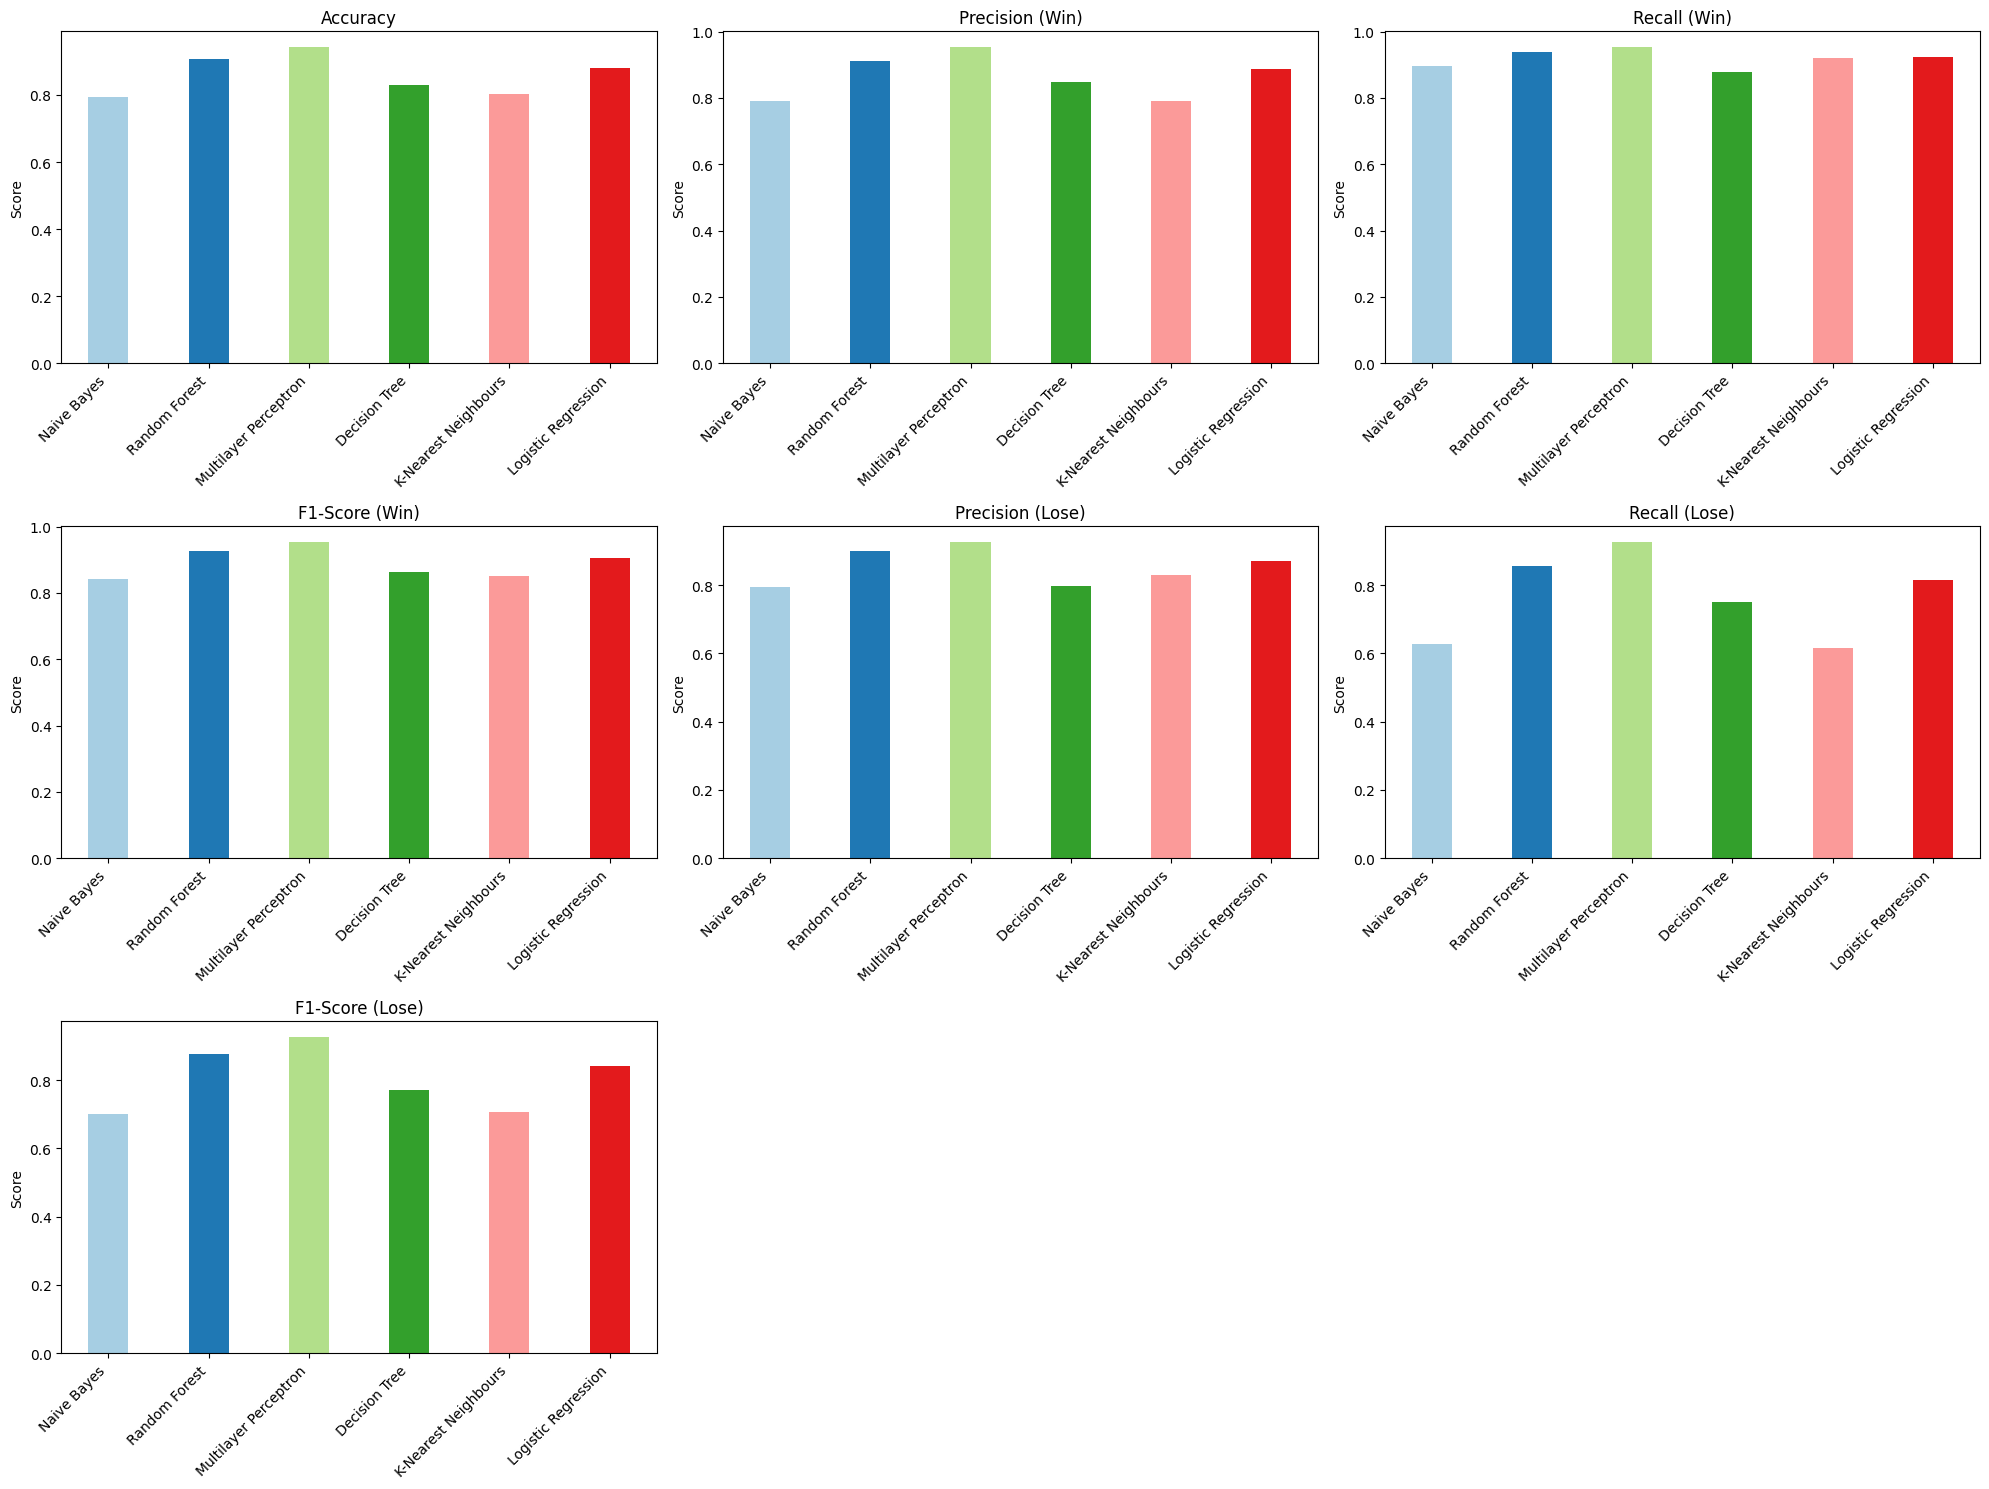

In [27]:
#plot to show comparision of classifiers

classifiers = comparison_df['Classifier']
metrics = comparison_df.columns[1:]  # Exclude the 'Classifier' column

# Number of rows and columns for subplots
n_rows = int(np.ceil(len(metrics) / 3))
n_cols = 3

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # Flatten to 1D array

# Set the bar width
bar_width = 0.4  

# Loop through each metric and create a bar chart
for i, metric in enumerate(metrics):
    r1 = np.arange(len(classifiers))
    axes[i].bar(r1, comparison_df[metric], width=bar_width, color=plt.cm.Paired(np.arange(len(classifiers))))
    axes[i].set_title(metric)
    axes[i].set_xticks(r1)
    axes[i].set_xticklabels(classifiers, rotation=45, ha="right")
    axes[i].set_ylabel('Score')

# Remove empty subplots if the number of metrics is not a multiple of the number of columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
fig.tight_layout()

# Show the plot
plt.show()

**Cross Validation of all classifiers**

In [16]:
#cross validation (using different training/testing) sets

# classifiers 
classifiers = {
    'Naive Bayes': GaussianNB(var_smoothing=1e-9),
    'Random Forest': RandomForestClassifier(n_estimators = 50, random_state = 42,max_features = "log2",max_depth = 30,criterion = "gini",bootstrap=False),
    'MLP' : MLPClassifier(solver='adam',activation='relu', alpha=0.01, hidden_layer_sizes=(100,), random_state=None,max_iter=1000,learning_rate='constant',early_stopping=True),
    'Decision Tree': DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) ,
    'K-nearest Neighbours': KNeighborsClassifier(n_neighbors = 15,weights = "distance",algorithm="auto",p=1 ),
    'Logistic Regression': LogisticRegression(penalty="l1",solver='liblinear',max_iter=100) 
}

# metrics wanted to collect
scoring_metrics = {
    'precision_lose': make_scorer(precision_score,pos_label=0,zero_division=0),
    'recall_lose':  make_scorer(recall_score,pos_label=0,zero_division=0),
    'f1_lose':  make_scorer(f1_score,pos_label=0,zero_division=0),
    'precision_win':  make_scorer(precision_score, pos_label=1,zero_division=0),
    'recall_win':  make_scorer(recall_score, pos_label=1,zero_division=0),
    'f1_win':  make_scorer(f1_score, pos_label=1,zero_division=0),
    'accuracy':make_scorer(accuracy_score)
}


n_splits=10
# Fit and score classifiers using cross-validation
cv = StratifiedKFold(n_splits, shuffle=True, random_state=42)
results = {}

# Results dictionary
for name, clf in classifiers.items():
    results[name] = cross_validate(clf, df_transformed, y.values.ravel(), scoring=scoring_metrics, cv=cv, return_train_score=False)

# For each fold and each classifier, print out a formatted table of results
for fold_idx in range(n_splits):
    print(f"Results for fold {fold_idx + 1}")
    fold_results = []
    
    for clf_name, clf_scores in results.items():
        fold_result = {
            'Classifier': clf_name,
            'Accuracy': clf_scores['test_accuracy'][fold_idx],
            'Precision (Lose)': clf_scores['test_precision_lose'][fold_idx],
            'Recall (Lose)': clf_scores['test_recall_lose'][fold_idx],
            'F1-Score (Lose)': clf_scores['test_f1_lose'][fold_idx],
            'Precision (Win)': clf_scores['test_precision_win'][fold_idx],
            'Recall (Win)': clf_scores['test_recall_win'][fold_idx],
            'F1-Score (Win)': clf_scores['test_f1_win'][fold_idx]
        }
        fold_results.append(fold_result)
    
    # Convert the fold results to DataFrame
    fold_df = pd.DataFrame(fold_results)
    
    fold_markdown = fold_df.to_markdown(index=False)
    
    # Display the Markdown-formatted string 
    display(Markdown(fold_markdown))


Results for fold 1


| Classifier           |   Accuracy |   Precision (Lose) |   Recall (Lose) |   F1-Score (Lose) |   Precision (Win) |   Recall (Win) |   F1-Score (Win) |
|:---------------------|-----------:|-------------------:|----------------:|------------------:|------------------:|---------------:|-----------------:|
| Naive Bayes          |   0.618569 |           0.333333 |     0.000399202 |       0.000797448 |          0.6187   |       0.999508 |         0.764296 |
| Random Forest        |   0.765297 |           1        |     0.384431    |       0.555363    |          0.724987 |       1        |         0.840571 |
| MLP                  |   0.618721 |           0        |     0           |       0           |          0.618721 |       1        |         0.764457 |
| Decision Tree        |   1        |           1        |     1           |       1           |          1        |       1        |         1        |
| K-nearest Neighbours |   0.927854 |           0.963064 |     0.843114    |       0.899106    |          0.910212 |       0.980074 |         0.943852 |
| Logistic Regression  |   1        |           1        |     1           |       1           |          1        |       1        |         1        |

Results for fold 2


| Classifier           |   Accuracy |   Precision (Lose) |   Recall (Lose) |   F1-Score (Lose) |   Precision (Win) |   Recall (Win) |   F1-Score (Win) |
|:---------------------|-----------:|-------------------:|----------------:|------------------:|------------------:|---------------:|-----------------:|
| Naive Bayes          |   0.395738 |           0.381184 |        0.938124 |          0.542099 |          0.617284 |      0.0615006 |         0.111857 |
| Random Forest        |   0.785693 |           0.99909  |        0.438323 |          0.609323 |          0.742826 |      0.999754  |         0.852349 |
| MLP                  |   0.618721 |           0        |        0        |          0        |          0.618721 |      1         |         0.764457 |
| Decision Tree        |   0.999696 |           0.999202 |        1        |          0.999601 |          1        |      0.999508  |         0.999754 |
| K-nearest Neighbours |   0.919787 |           0.960857 |        0.823154 |          0.886691 |          0.899864 |      0.979336  |         0.93792  |
| Logistic Regression  |   0.999848 |           1        |        0.999601 |          0.9998   |          0.999754 |      1         |         0.999877 |

Results for fold 3


| Classifier           |   Accuracy |   Precision (Lose) |   Recall (Lose) |   F1-Score (Lose) |   Precision (Win) |   Recall (Win) |   F1-Score (Win) |
|:---------------------|-----------:|-------------------:|----------------:|------------------:|------------------:|---------------:|-----------------:|
| Naive Bayes          |   0.618721 |           0.5      |     0.000399202 |       0.000797766 |          0.618758 |       0.999754 |         0.764413 |
| Random Forest        |   0.833333 |           1        |     0.562874    |       0.720307    |          0.787791 |       1        |         0.881301 |
| MLP                  |   0.618721 |           0.5      |     0.000399202 |       0.000797766 |          0.618758 |       0.999754 |         0.764413 |
| Decision Tree        |   1        |           1        |     1           |       1           |          1        |       1        |         1        |
| K-nearest Neighbours |   0.930898 |           0.967624 |     0.847106    |       0.903363    |          0.912497 |       0.982534 |         0.946221 |
| Logistic Regression  |   1        |           1        |     1           |       1           |          1        |       1        |         1        |

Results for fold 4


| Classifier           |   Accuracy |   Precision (Lose) |   Recall (Lose) |   F1-Score (Lose) |   Precision (Win) |   Recall (Win) |   F1-Score (Win) |
|:---------------------|-----------:|-------------------:|----------------:|------------------:|------------------:|---------------:|-----------------:|
| Naive Bayes          |   0.598174 |           0.40612  |     0.116567    |         0.181141  |          0.621774 |       0.894957 |         0.733764 |
| Random Forest        |   0.73516  |           1        |     0.305389    |         0.46789   |          0.700258 |       1        |         0.823708 |
| MLP                  |   0.618874 |           0.666667 |     0.000798403 |         0.0015949 |          0.618852 |       0.999754 |         0.764485 |
| Decision Tree        |   0.999848 |           0.999601 |     1           |         0.9998    |          1        |       0.999754 |         0.999877 |
| K-nearest Neighbours |   0.92207  |           0.961556 |     0.828743    |         0.890223  |          0.902743 |       0.979582 |         0.939594 |
| Logistic Regression  |   1        |           1        |     1           |         1         |          1        |       1        |         1        |

Results for fold 5


| Classifier           |   Accuracy |   Precision (Lose) |   Recall (Lose) |   F1-Score (Lose) |   Precision (Win) |   Recall (Win) |   F1-Score (Win) |
|:---------------------|-----------:|-------------------:|----------------:|------------------:|------------------:|---------------:|-----------------:|
| Naive Bayes          |   0.400913 |           0.383791 |     0.943313    |        0.545601   |          0.656174 |      0.0666667 |         0.121036 |
| Random Forest        |   0.789954 |           1        |     0.449102    |        0.619835   |          0.746556 |      1         |         0.85489  |
| MLP                  |   0.619026 |           1        |     0.000798403 |        0.00159553 |          0.61891  |      1         |         0.764601 |
| Decision Tree        |   1        |           1        |     1           |        1          |          1        |      1         |         1        |
| K-nearest Neighbours |   0.926941 |           0.969838 |     0.834331    |        0.896996   |          0.906002 |      0.98401   |         0.943396 |
| Logistic Regression  |   0.999848 |           1        |     0.999601    |        0.9998     |          0.999754 |      1         |         0.999877 |

Results for fold 6


| Classifier           |   Accuracy |   Precision (Lose) |   Recall (Lose) |   F1-Score (Lose) |   Precision (Win) |   Recall (Win) |   F1-Score (Win) |
|:---------------------|-----------:|-------------------:|----------------:|------------------:|------------------:|---------------:|-----------------:|
| Naive Bayes          |   0.391933 |           0.379176 |     0.933333    |         0.539269  |          0.586634 |      0.0583026 |         0.106064 |
| Random Forest        |   0.748402 |           1        |     0.34012     |         0.507596  |          0.710913 |      1         |         0.831033 |
| MLP                  |   0.618874 |           0.666667 |     0.000798403 |         0.0015949 |          0.618852 |      0.999754  |         0.764485 |
| Decision Tree        |   1        |           1        |     1           |         1         |          1        |      1         |         1        |
| K-nearest Neighbours |   0.930594 |           0.962111 |     0.851497    |         0.903431  |          0.914542 |      0.979336  |         0.94583  |
| Logistic Regression  |   1        |           1        |     1           |         1         |          1        |      1         |         1        |

Results for fold 7


| Classifier           |   Accuracy |   Precision (Lose) |   Recall (Lose) |   F1-Score (Lose) |   Precision (Win) |   Recall (Win) |   F1-Score (Win) |
|:---------------------|-----------:|-------------------:|----------------:|------------------:|------------------:|---------------:|-----------------:|
| Naive Bayes          |   0.398174 |           0.382176 |        0.938124 |          0.543101 |          0.631829 |      0.0654367 |         0.118591 |
| Random Forest        |   0.836377 |           1        |        0.570858 |          0.726811 |          0.790856 |      1         |         0.883216 |
| MLP                  |   0.618721 |           0        |        0        |          0        |          0.618721 |      1         |         0.764457 |
| Decision Tree        |   1        |           1        |        1        |          1        |          1        |      1         |         1        |
| K-nearest Neighbours |   0.922374 |           0.962877 |        0.828343 |          0.890558 |          0.902605 |      0.98032   |         0.939858 |
| Logistic Regression  |   0.999848 |           0.999601 |        1        |          0.9998   |          1        |      0.999754  |         0.999877 |

Results for fold 8


| Classifier           |   Accuracy |   Precision (Lose) |   Recall (Lose) |   F1-Score (Lose) |   Precision (Win) |   Recall (Win) |   F1-Score (Win) |
|:---------------------|-----------:|-------------------:|----------------:|------------------:|------------------:|---------------:|-----------------:|
| Naive Bayes          |   0.618721 |           0.5      |     0.000399202 |       0.000797766 |          0.618758 |       0.999754 |         0.764413 |
| Random Forest        |   0.729833 |           1        |     0.291417    |       0.451314    |          0.696062 |       1        |         0.820798 |
| MLP                  |   0.618721 |           0        |     0           |       0           |          0.618721 |       1        |         0.764457 |
| Decision Tree        |   1        |           1        |     1           |       1           |          1        |       1        |         1        |
| K-nearest Neighbours |   0.919178 |           0.962512 |     0.81996     |       0.885536    |          0.898332 |       0.98032  |         0.937537 |
| Logistic Regression  |   0.999848 |           0.999601 |     1           |       0.9998      |          1        |       0.999754 |         0.999877 |

Results for fold 9


| Classifier           |   Accuracy |   Precision (Lose) |   Recall (Lose) |   F1-Score (Lose) |   Precision (Win) |   Recall (Win) |   F1-Score (Win) |
|:---------------------|-----------:|-------------------:|----------------:|------------------:|------------------:|---------------:|-----------------:|
| Naive Bayes          |   0.618968 |           0.6      |      0.00119808 |        0.00239139 |          0.618982 |       0.999508 |         0.764512 |
| Random Forest        |   0.780636 |           1        |      0.424521   |        0.596019   |          0.738286 |       1        |         0.849441 |
| MLP                  |   0.618968 |           0.6      |      0.00119808 |        0.00239139 |          0.618982 |       0.999508 |         0.764512 |
| Decision Tree        |   1        |           1        |      1          |        1          |          1        |       1        |         1        |
| K-nearest Neighbours |   0.923276 |           0.963392 |      0.830272   |        0.891892   |          0.90365  |       0.980566 |         0.940538 |
| Logistic Regression  |   1        |           1        |      1          |        1          |          1        |       1        |         1        |

Results for fold 10


| Classifier           |   Accuracy |   Precision (Lose) |   Recall (Lose) |   F1-Score (Lose) |   Precision (Win) |   Recall (Win) |   F1-Score (Win) |
|:---------------------|-----------:|-------------------:|----------------:|------------------:|------------------:|---------------:|-----------------:|
| Naive Bayes          |   0.560359 |           0.412648 |     0.36222     |       0.385793    |          0.634637 |       0.682411 |         0.657658 |
| Random Forest        |   0.855534 |           1        |     0.621006    |       0.766199    |          0.81073  |       1        |         0.895473 |
| MLP                  |   0.618968 |           1        |     0.000399361 |       0.000798403 |          0.61891  |       1        |         0.764601 |
| Decision Tree        |   1        |           1        |     1           |       1           |          1        |       1        |         1        |
| K-nearest Neighbours |   0.924646 |           0.96269  |     0.834665    |       0.894118    |          0.905866 |       0.980074 |         0.94151  |
| Logistic Regression  |   1        |           1        |     1           |       1           |          1        |       1        |         1        |

**Hyper parameter optimization**

In [16]:
#hyperparameter optimization using RandomizedSearchCV for RandomForestClassifier

# Define the parameter distribution
param_distr = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'random_state' : [40,42,45],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distr,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(trainX, trainY.values.ravel())

# random_search.best_params_ contains the best parameters found
print("Best parameters found: ", random_search.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50, random_state=40; total time=  10.1s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50, random_state=40; total time=  10.2s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50, random_state=40; total time=  10.3s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=log2, n_estimators=100, random_state=42; total time=  31.8s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=log2, n_estimators=100, random_state=42; total time=  31.8s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=log2, n_estimators=100, random_state=42; total time=  32.0s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=sqrt, n_estimators=50, random_state=42; total time=  25.2s
[CV] END bootstrap=True, criterion=

In [73]:
#hyperparameter optimization using RandomizedSearchCV for MLP

# Define the parameters
param_distr= {
    'solver':['adam','lbfgs', 'sgd'],              # Solver for weight optimization
    'alpha':[0.0001,1e-5] ,            
    'random_state':[1,None] ,  
    'learning_rate':['constant', 'invscaling', 'adaptive'],
    'hidden_layer_sizes': [(50,), (100,), (200,)], # Size of the hidden layer
    'activation': ['identity', 'logistic','tanh', 'relu'],   # Activation function
    'alpha': [0.0001, 0.001, 0.01]   # L2 penalty parameter
}

# Create a base model
mlp_eval = MLPClassifier()

random_search = RandomizedSearchCV(estimator=mlp_eval, param_distributions=param_distr,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search to the data
random_search.fit(trainX, trainY.values.ravel())

# random_search.best_params_ contains the best parameters found
print("Best parameters found: ", random_search.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, random_state=None, solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, random_state=None, solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, random_state=None, solver=lbfgs; total time=   0.6s
[CV] END activation=identity, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, random_state=1, solver=adam; total time=   2.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200,), learning_rate=adaptive, random_state=None, solver=adam; total time=   3.7s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200,), learning_rate=adaptive, random_state=None, solver=adam; total time=   3.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(200,), learning_rat

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(200,), learning_rate=adaptive, random_state=None, solver=sgd; total time=  19.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(200,), learning_rate=adaptive, random_state=None, solver=sgd; total time=  19.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(200,), learning_rate=adaptive, random_state=None, solver=sgd; total time=  19.9s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling, random_state=None, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling, random_state=None, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=invscaling, random_state=None, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, random_state=None, solver=lbfgs; total time=  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, random_state=None, solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, random_state=None, solver=adam; total time=   2.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, random_state=None, solver=lbfgs; total time=   1.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, random_state=None, solver=adam; total time=   2.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, random_state=None, solver=sgd; total time=   7.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, random_state=None, solver=adam; total time=   2.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, random_state=None, solver=lbfgs; total t

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, random_state=None, solver=sgd; total time=   8.1s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, random_state=1, solver=lbfgs; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, random_state=1, solver=lbfgs; total time=   0.5s
[CV] END activation=identity, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=adaptive, random_state=1, solver=lbfgs; total time=   0.5s
[CV] END activation=identity, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, random_state=1, solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, random_state=None, solver=lbfgs; total time=   0.8s
[CV] END activation=identity, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, random_state=1, solver=lbfgs; total time=   0.3s
[

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, random_state=1, solver=sgd; total time=   8.9s
[CV] END activation=identity, alpha=0.001, hidden_layer_sizes=(200,), learning_rate=invscaling, random_state=None, solver=sgd; total time=   2.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, random_state=1, solver=sgd; total time=   9.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, random_state=1, solver=sgd; total time=   8.9s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200,), learning_rate=adaptive, random_state=1, solver=adam; total time=   6.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200,), learning_rate=invscaling, random_state=1, solver=lbfgs; total time=   1.9s
[CV] END activation=identity, alpha=0.001, hidden_layer_sizes=(200,), learning_rate=invscaling, random_state=None, solver=sgd; total time=   2.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200,), learning_rate=invscaling, random_state=1, solver=lbfgs; total time=   2.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(200,), learning_rate=invscaling, random_state=1, solver=lbfgs; total time=   2.0s
[CV] END activation=identity, alpha=0.001, hidden_layer_sizes=(200,), learning_rate=invscaling, random_state=None, solver=sgd; total time=   3.0s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, random_state=1, solver=sgd; total time=   8.6s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, random_state=1, solver=sgd; total time=   8.7s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, random_state=1, solver=sgd; total time=   8.8s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, random_state=None, solver=adam; total time=   2.5s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, random_state=None, solver=adam; total time=   2.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), learning_rate=adaptive, random_state=None, solver=adam; total time=   6.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), learning_rate=adaptive, random_state=None, solver=adam; total time=   7.1s
[CV] END act

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), learning_rate=constant, random_state=None, solver=sgd; total time=  23.9s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), learning_rate=constant, random_state=None, solver=sgd; total time=  24.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(200,), learning_rate=constant, random_state=None, solver=sgd; total time=  24.0s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, random_state=1, solver=lbfgs; total time=   0.7s
[CV] END activation=identity, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, random_state=1, solver=sgd; total time=   3.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, random_state=1, solver=lbfgs; total time=   0.8s
[CV] END activation=identity, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, random_state=1, solver=sgd; total time=   3.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, random_state=1, solver=lbfgs; total time=   0.8s
[CV] END activation=identity, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, random_state=1, solver=sgd; total time=   3.5s
[CV] END activati

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200,), learning_rate=constant, random_state=None, solver=sgd; total time=  22.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(200,), learning_rate=constant, random_state=None, solver=sgd; total time=  22.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(200,), learning_rate=adaptive, random_state=1, solver=sgd; total time=  16.3s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(200,), learning_rate=adaptive, random_state=1, solver=sgd; total time=  15.9s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(200,), learning_rate=adaptive, random_state=1, solver=sgd; total time=  16.0s
Best parameters found:  {'solver': 'adam', 'random_state': None, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'relu'}


In [75]:
#hyperparameter optimization using RandomizedSearchCV for Decision Tree

# Define the parameter distribution
param_distr = {
    'criterion': ['gini', 'entropy','log_loss'],  #measure the quality of a split
    'splitter':['best', 'random'],        #choose the split at each node
    'max_features': ['sqrt', 'log2'],    #number of features to consider when looking for the best split
    'max_depth': [None, 10, 20, 30],    #maximum depth of the tree
}

# Create a base model
df_eval = DecisionTreeClassifier()

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=df_eval, param_distributions=param_distr,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(trainX, trainY.values.ravel())

# random_search.best_params_ contains the best parameters found
print("Best parameters found: ", random_search.best_params_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END criterion=gini, max_depth=None, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, splitter=random; total time=   0.0s[CV] END criterion=gini, max_depth=None, max_features=sqrt, splitter=random; total time=   0.0s

[CV] END criterion=gini, max_depth=None, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_featu

In [78]:
#hyperparameter optimization using RandomizedSearchCV for K-nearest neighbours

# Define the parameter distribution
param_distr = {
    'n_neighbors':[5,10,15],    #Number of neighbors to use
    'weights':['uniform','distance'],     #Weight function used in prediction
    'algorithm':['auto','ball_tree','kd_tree','brute'],    #Algorithm used to compute the nearest neighbors
    'p':[1,2]     #manhattan_distance(1),euclidean_distance(2)    
}

# Create a base model
knn_eval = KNeighborsClassifier()

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=knn_eval, param_distributions=param_distr,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(trainX, trainY.values.ravel())

# random_search.best_params_ contains the best parameters found
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END algorithm=auto, n_neighbors=5, p=2, weights=uniform; total time=   1.5s
[CV] END algorithm=auto, n_neighbors=5, p=2, weights=distance; total time=   1.5s
[CV] END algorithm=auto, n_neighbors=5, p=2, weights=uniform; total time=   1.5s
[CV] END algorithm=auto, n_neighbors=5, p=2, weights=uniform; total time=   1.5s
[CV] END algorithm=auto, n_neighbors=5, p=2, weights=distance; total time=   1.4s
[CV] END algorithm=auto, n_neighbors=5, p=2, weights=distance; total time=   1.4s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=uniform; total time=   7.4s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   7.6s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=uniform; total time=   7.6s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   7.6s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   7.7s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=uniform; total time=   7.7s
[CV] END algorithm=aut

In [86]:
#hyperparameter optimization using RandomizedSearchCV for Logistic regression 
lr = LogisticRegression(penalty="l1",solver='liblinear',max_iter=100) 
# Define the parameter distribution
param_distr = {
   "penalty":['l1', 'l2', 'elasticnet', None],
   "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
   "max_iter":[100,150,200]   
}

# Create a base model
lr_eval = LogisticRegression()

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=lr_eval, param_distributions=param_distr,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(trainX, trainY.values.ravel())

# random_search.best_params_ contains the best parameters found
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END .............max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .............max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .............max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...max_iter=100, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ...max_iter=100, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ...............max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...............max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...............max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...max_iter=100, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END .............max_it

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=4.83046e-19): result may not be accurate.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:498: LinAlgWarning: The inner solver of Ne

[CV] END ..............max_iter=100, penalty=l1, solver=saga; total time=   1.3s
[CV] END .......max_iter=100, penalty=None, solver=newton-cg; total time=   0.1s
[CV] END .max_iter=100, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END ..............max_iter=100, penalty=l1, solver=saga; total time=   1.3s
[CV] END .max_iter=100, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END ..............max_iter=100, penalty=l1, solver=saga; total time=   1.4s
[CV] END ...............max_iter=100, penalty=l2, solver=sag; total time=   1.0s
[CV] END .max_iter=100, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END ...............max_iter=100, penalty=l2, solver=sag; total time=   1.0s
[CV] END .............max_iter=150, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .............max_iter=150, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .............max_iter=150, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........max_iter=1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............max_iter=100, penalty=l2, solver=saga; total time=   1.1s
[CV] END .............max_iter=150, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........max_iter=150, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .............max_iter=150, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .............max_iter=150, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..............max_iter=100, penalty=l2, solver=saga; total time=   1.1s
[CV] END .........max_iter=150, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .........max_iter=150, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .........max_iter=150, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .........max_iter=150, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...max_iter=150, penalty=l2, solver=newton-cholesky; total time=   0.1s
[CV] END .........max_iter=150, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .........max_iter=1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.33681e-20): result may not be accurate.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which m

[CV] END .max_iter=150, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END .............max_iter=100, penalty=None, solver=sag; total time=   1.0s
[CV] END .max_iter=150, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END ............max_iter=100, penalty=None, solver=saga; total time=   1.1s
[CV] END .......max_iter=150, penalty=None, solver=newton-cg; total time=   0.1s
[CV] END .max_iter=150, penalty=None, solver=newton-cholesky; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

[CV] END ...............max_iter=150, penalty=l2, solver=sag; total time=   1.5s
[CV] END .............max_iter=100, penalty=None, solver=sag; total time=   1.0s
[CV] END ..............max_iter=150, penalty=l1, solver=saga; total time=   1.9s
[CV] END ...............max_iter=150, penalty=l2, solver=sag; total time=   1.6s
[CV] END .............max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .............max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..............max_iter=150, penalty=l1, solver=saga; total time=   1.9s
[CV] END .............max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..............max_iter=150, penalty=l2, solver=saga; total time=   1.6s
[CV] END ............max_iter=100, penalty=None, solver=saga; total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............max_iter=100, penalty=None, solver=saga; total time=   1.1s
[CV] END .........max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...max_iter=200, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ...max_iter=200, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ...max_iter=200, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ...............max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...............max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...............max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........max_iter=200, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .........max_iter=2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........max_iter=200, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .........max_iter=200, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END .........max_iter=200, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ............max_iter=150, penalty=None, solver=saga; total time=   1.4s
[CV] END ...............max_iter=150, penalty=l2, solver=sag; total time=   1.5s
[CV] END .........max_iter=200, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..............max_iter=150, penalty=l2, solver=saga; total time=   1.6s
[CV] END .........max_iter=200, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...max_iter=200, penalty=l2, solver=newton-cholesky; total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........max_iter=200, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...max_iter=200, penalty=l2, solver=newton-cholesky; total time=   0.1s
[CV] END ...max_iter=200, penalty=l2, solver=newton-cholesky; total time=   0.1s
[CV] END ..............max_iter=150, penalty=l2, solver=saga; total time=   1.7s
[CV] END .....max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .....max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .....max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .max_iter=200, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .max_iter=200, pena

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END max_iter=200, penalty=elasticnet, solver=newton-cholesky; total time=   0.0s
[CV] END .......max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END .......max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END .......max_iter=200, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ......max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..............max_iter=150, penalty=l1, solver=saga; total time=   1.9s
[CV] END ...........max_iter=200, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END ...........max_iter=200, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .......max_iter=200, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ...........max_iter=200, penalty=None, solver=lbfgs; total time=   0.0s
[CV] END .......max_ite

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.33681e-20): result may not be accurate.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:498: LinAlgWarning: The inner solver of Ne

[CV] END .............max_iter=150, penalty=None, solver=sag; total time=   1.5s
[CV] END .......max_iter=200, penalty=None, solver=newton-cg; total time=   0.1s
[CV] END .......max_iter=200, penalty=None, solver=newton-cg; total time=   0.2s
[CV] END .max_iter=200, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END .max_iter=200, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END ............max_iter=150, penalty=None, solver=saga; total time=   1.6s
[CV] END .max_iter=200, penalty=None, solver=newton-cholesky; total time=   0.0s
[CV] END .......max_iter=200, penalty=None, solver=newton-cg; total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............max_iter=200, penalty=l1, solver=saga; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............max_iter=200, penalty=l1, solver=saga; total time=   2.7s
[CV] END ............max_iter=150, penalty=None, solver=saga; total time=   1.6s
[CV] END ...............max_iter=200, penalty=l2, solver=sag; total time=   1.7s
[CV] END ...............max_iter=200, penalty=l2, solver=sag; total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............max_iter=200, penalty=l2, solver=saga; total time=   2.2s
[CV] END .............max_iter=200, penalty=None, solver=sag; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............max_iter=200, penalty=None, solver=sag; total time=   2.0s
[CV] END ............max_iter=200, penalty=None, solver=saga; total time=   2.1s
[CV] END .............max_iter=200, penalty=None, solver=sag; total time=   2.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............max_iter=200, penalty=None, solver=saga; total time=   1.9s
[CV] END ...............max_iter=200, penalty=l2, solver=sag; total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............max_iter=200, penalty=None, solver=saga; total time=   1.9s
[CV] END ..............max_iter=200, penalty=l1, solver=saga; total time=   2.2s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............max_iter=200, penalty=l2, solver=saga; total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
99 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Fram

[CV] END ..............max_iter=200, penalty=l2, solver=saga; total time=   1.6s
Best parameters found:  {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100}


**Ensembles**

**Stacking classifier**

In [31]:
#Level 0 classifiers(Base Classifiers) with 5 models:
estimators = []
estimators.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)))
estimators.append(('Random Forest Classifier',RandomForestClassifier(n_estimators = 50, random_state = 42,max_features = "log2",max_depth = 30,criterion = "gini",bootstrap=False)))
estimators.append(('Naive Bayes',GaussianNB(var_smoothing=1e-9)))
estimators.append(('Multi layer perceptron',MLPClassifier(solver='adam',activation='relu', alpha=0.01, hidden_layer_sizes=(100,), random_state=None,max_iter=1000,learning_rate='constant',early_stopping=True)))
estimators.append(('k-nearest neighbours',KNeighborsClassifier(n_neighbors = 15,weights = "distance",algorithm="auto",p=1)))

In [32]:
#Level 1 classifier(Meta-Classifier)
LR = LogisticRegression(penalty="l1",solver='liblinear',max_iter=100)

              precision    recall  f1-score   support

        Lose       0.93      0.92      0.93      6376
         Win       0.95      0.95      0.95     10049

    accuracy                           0.94     16425
   macro avg       0.94      0.94      0.94     16425
weighted avg       0.94      0.94      0.94     16425



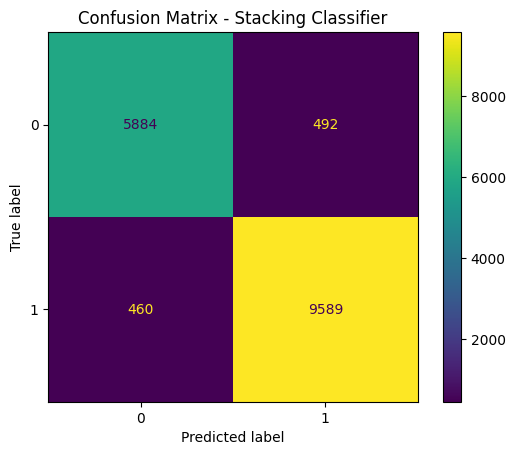

In [34]:
#creating a stacking classifier

SC = StackingClassifier(estimators=estimators,final_estimator=LR,cv=6)
SC.fit(trainX, trainY["encoded_W"])        #train the model
y_SC = SC.predict(testX)         #predict model for test dataset

target_names = ['Lose', 'Win']
report_stacking = classification_report(testY["encoded_W"], y_SC, target_names=target_names,output_dict = True)   #classification report
print(classification_report(testY["encoded_W"], y_SC, target_names=target_names))

#confusion matrix
cm = confusion_matrix(testY, y_SC, labels=SC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SC.classes_)
disp.plot()
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()


**Cross validation for Stacking classifier**

In [54]:
#cross-validation for stacking classifier

# metrics wanted to collect
scoring_metrics = {
    'precision_lose': make_scorer(precision_score,pos_label=0),
    'recall_lose':  make_scorer(recall_score,pos_label=0),
    'f1_lose':  make_scorer(f1_score,pos_label=0),
    'precision_win':  make_scorer(precision_score, pos_label=1),
    'recall_win':  make_scorer(recall_score, pos_label=1),
    'f1_win':  make_scorer(f1_score, pos_label=1),
    'accuracy':make_scorer(accuracy_score)
}

# Perform cross-validation for 5 folds
scores = cross_validate(SC, trainX, trainY["encoded_W"], cv=5, scoring=scoring_metrics, error_score='raise')

# Print out scores for each fold
results_df_stacking = pd.DataFrame(scores)
results_df_stacking['fold'] = results_df_stacking.index + 1
results_df_stacking


,fit_time,score_time,test_precision_lose,test_recall_lose,test_f1_lose,test_precision_win,test_recall_win,test_f1_win,test_accuracy,fold
0,206.836406,4.805272,0.919063,0.924230,0.921639,0.953599,0.950327,0.951960,0.940436,1
1,189.438662,4.233685,0.932785,0.910308,0.921409,0.946055,0.959967,0.952960,0.941147,2
2,172.265137,3.169328,0.926136,0.916711,0.921400,0.949505,0.955399,0.952443,0.940741,3
3,140.166030,3.453940,0.932065,0.918586,0.925277,0.950761,0.959150,0.954937,0.943779,4
4,135.884401,3.315842,0.920712,0.914301,0.917495,0.947934,0.951961,0.949943,0.937690,5


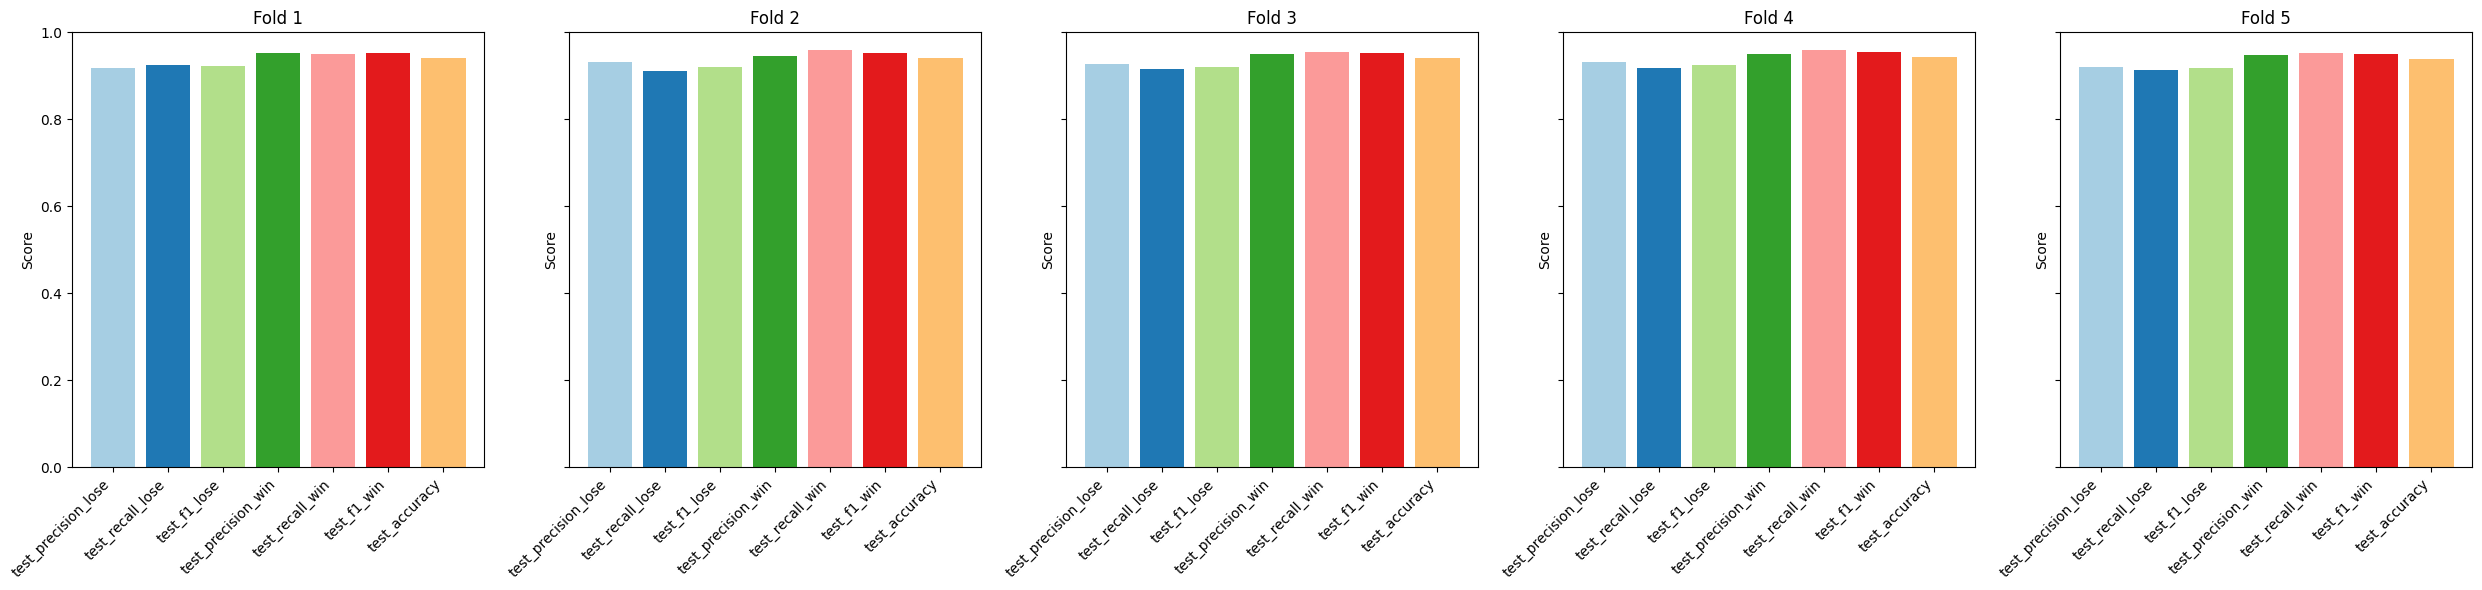

In [55]:
#visualizing cross-validation data of stacking classifier

# Remove 'fit_time', 'score_time', and 'fold' columns
metrics_df = results_df_stacking.drop(columns=['fit_time', 'score_time', 'fold'])

n_folds = metrics_df.shape[0]  # Number of folds
n_metrics = metrics_df.shape[1]
fig, axes = plt.subplots(nrows=1, ncols=n_folds, figsize=(n_folds * 5, 6), sharey=True)

# Loop through each fold and create a bar chart
for i in range(n_folds):
    # Get the metrics for the i-th fold (all columns for the i-th row)
    fold_metrics = metrics_df.iloc[i, :]
    axes[i].bar(fold_metrics.index, fold_metrics.values, color=plt.cm.Paired(np.arange(len(fold_metrics))))
    axes[i].set_title(f'Fold {i+1}')

    # set_xticks is set with the positions of the bars
    axes[i].set_xticks(range(len(fold_metrics)))
    axes[i].set_xticklabels(fold_metrics.index, rotation=45, ha="right")

    axes[i].set_ylim(0, 1)  #set the y-axis limits
    axes[i].set_ylabel('Score')
        

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


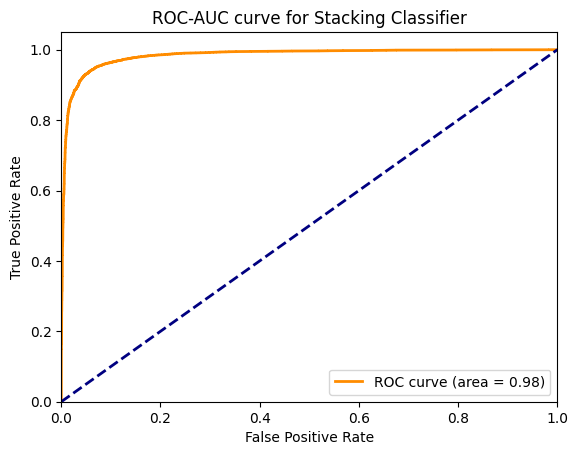

In [38]:
#ROC-AUC curve for stacking classifier

# Predict probabilities for the test set
y_probs = SC.predict_proba(testX)[:, 1]  # Probabilities for the positive class 

# Get true binary labels and predicted probabilities
y_true = testY["encoded_W"]  

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_probs)

# Calculate the AUC (Area under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve for Stacking Classifier')
plt.legend(loc="lower right")
plt.show()


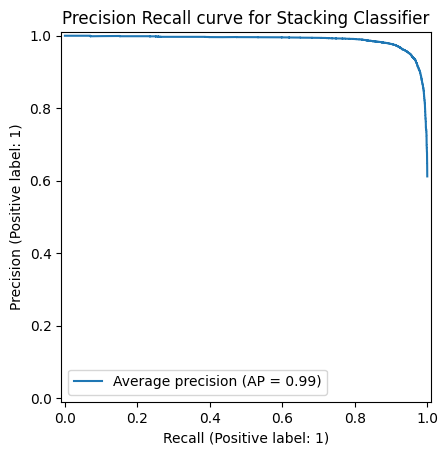

In [38]:
#Precision Recall curve for stacking classifier
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    SC, testX, testY, name="Average precision")
_ = display.ax_.set_title("Precision Recall curve for Stacking Classifier")

**Voting Classifier**

**Voting Classifier with hard voting**

In [39]:
# All classifiers
estimator_voting = []
estimator_voting.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)))
estimator_voting.append(('Random Forest Classifier',RandomForestClassifier(n_estimators = 50, random_state = 42,max_features = "log2",max_depth = 30,criterion = "gini",bootstrap=False)))
estimator_voting.append(('Naive Bayes',GaussianNB(var_smoothing=1e-9)))
estimator_voting.append(('Multi layer perceptron',MLPClassifier(solver='adam',activation='relu', alpha=0.01, hidden_layer_sizes=(100,), random_state=None,max_iter=1000,learning_rate='constant',early_stopping=True)))
estimator_voting.append(('k-nearest neighbours',KNeighborsClassifier(n_neighbors = 15,weights = "distance",algorithm="auto",p=1)))
estimator_voting.append(('Logistic Regression',LogisticRegression(penalty="l1",solver='liblinear',max_iter=100)))

              precision    recall  f1-score   support

        Lose       0.88      0.85      0.86      6376
         Win       0.91      0.93      0.92     10049

    accuracy                           0.90     16425
   macro avg       0.89      0.89      0.89     16425
weighted avg       0.90      0.90      0.90     16425



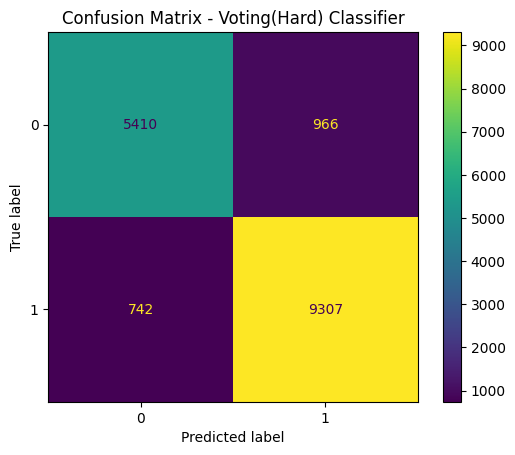

In [40]:
#Voting Classifier with hard voting

VC_hard = VotingClassifier(estimators = estimator_voting, voting ='hard')
VC_hard.fit(trainX, trainY["encoded_W"])
y_VC = VC_hard.predict(testX)

report_hard = classification_report(testY["encoded_W"], y_VC, target_names=target_names,output_dict = True)
print(classification_report(testY, y_VC, target_names=target_names))

#confusion matrix
cm = confusion_matrix(testY, y_VC, labels=VC_hard.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=VC_hard.classes_)
disp.plot()
plt.title("Confusion Matrix - Voting(Hard) Classifier")
plt.show()


**cross-validation for voting(hard) classifier**

In [56]:
#cross-validation for voting(hard) classifier

# metrics wanted to collect
scoring_metrics = {
    'precision_lose': make_scorer(precision_score,pos_label=0),
    'recall_lose':  make_scorer(recall_score,pos_label=0),
    'f1_lose':  make_scorer(f1_score,pos_label=0),
    'precision_win':  make_scorer(precision_score, pos_label=1),
    'recall_win':  make_scorer(recall_score, pos_label=1),
    'f1_win':  make_scorer(f1_score, pos_label=1),
    'accuracy':make_scorer(accuracy_score)
}

# Perform cross-validation
scores = cross_validate(VC_hard, trainX, trainY["encoded_W"], cv=5, scoring=scoring_metrics, error_score='raise')

# Print out scores for each fold
results_df_hard = pd.DataFrame(scores)
results_df_hard['fold'] = results_df_hard.index + 1
results_df_hard


,fit_time,score_time,test_precision_lose,test_recall_lose,test_f1_lose,test_precision_win,test_recall_win,test_f1_win,test_accuracy,fold
0,27.707862,3.371713,0.851036,0.868809,0.859830,0.918901,0.907190,0.913008,0.892643,1
1,24.463594,3.333831,0.885933,0.838019,0.861310,0.904302,0.934150,0.918984,0.897717,2
2,31.172650,3.402772,0.858775,0.885913,0.872133,0.929035,0.911126,0.919993,0.901573,3
3,26.212091,3.388380,0.895726,0.841993,0.868029,0.906999,0.940196,0.923299,0.902984,4
4,34.517389,3.477920,0.888070,0.839314,0.863004,0.905138,0.935458,0.920048,0.899026,5


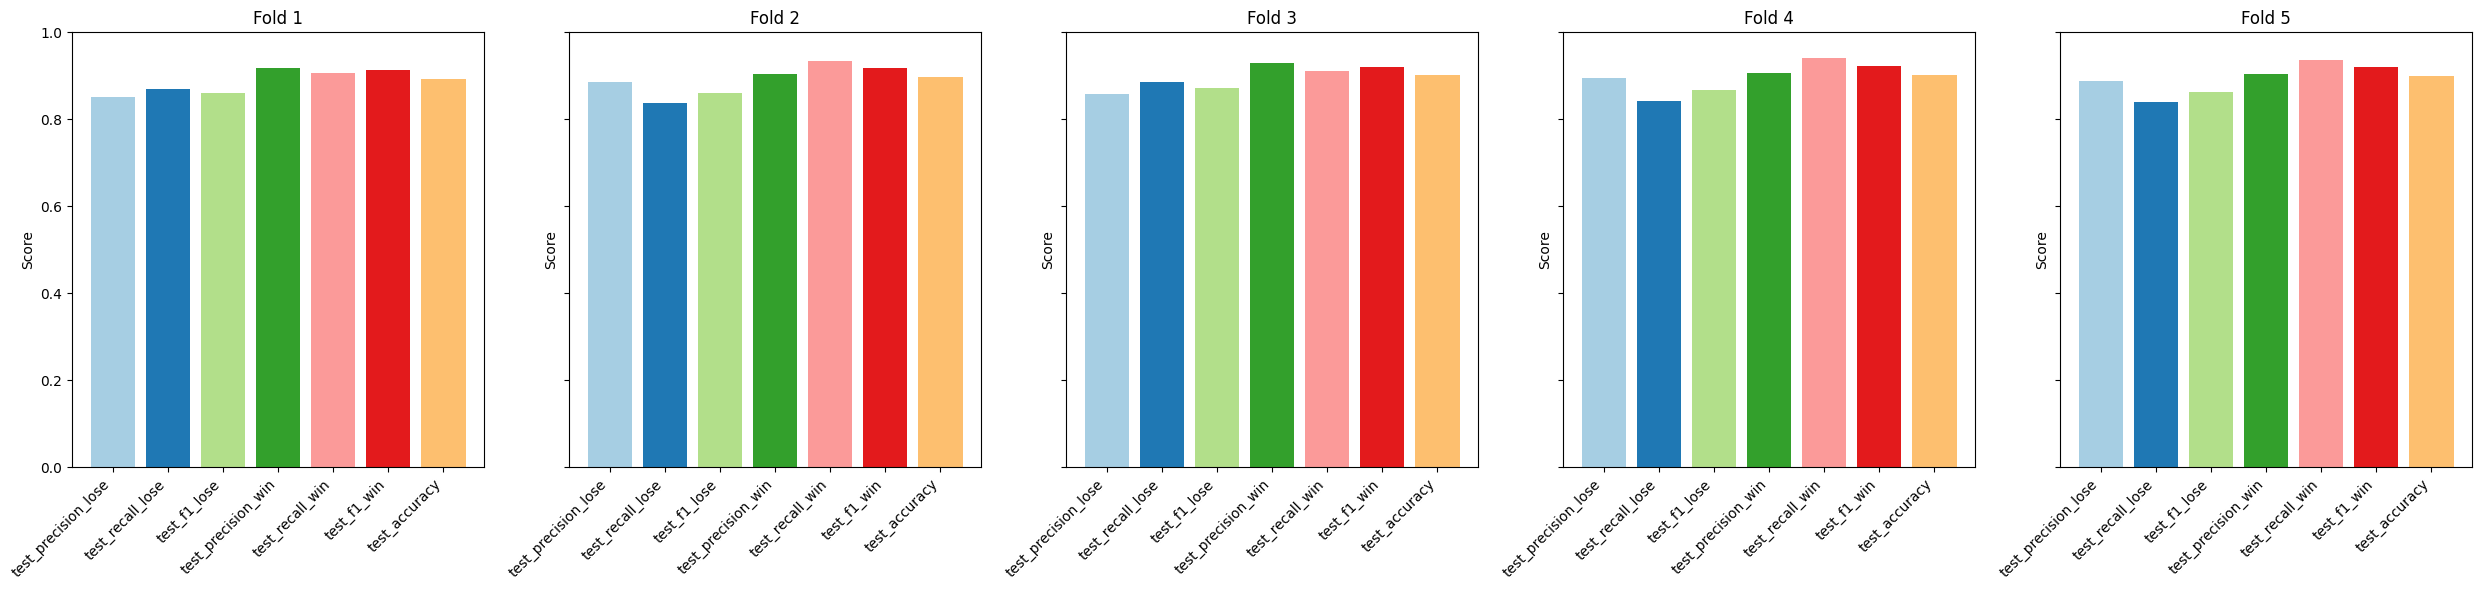

In [57]:
#visualizing cross-validation data of voting(hard) classifier

# Remove 'fit_time', 'score_time', and 'fold' columns
metrics_df = results_df_hard.drop(columns=['fit_time', 'score_time', 'fold'])

n_folds = metrics_df.shape[0]  # Number of folds
n_metrics = metrics_df.shape[1]
fig, axes = plt.subplots(nrows=1, ncols=n_folds, figsize=(n_folds * 5, 6), sharey=True)

# Loop through each fold and create a bar chart
for i in range(n_folds):
    # Get the metrics for the i-th fold (all columns for the i-th row)
    fold_metrics = metrics_df.iloc[i, :]
    axes[i].bar(fold_metrics.index, fold_metrics.values, color=plt.cm.Paired(np.arange(len(fold_metrics))))
    axes[i].set_title(f'Fold {i+1}')

    # set_xticks is set with the positions of the bars
    axes[i].set_xticks(range(len(fold_metrics)))
    axes[i].set_xticklabels(fold_metrics.index, rotation=45, ha="right")

    axes[i].set_ylim(0, 1)   # Set the y-axis limit 
    axes[i].set_ylabel('Score')
        

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


**Voting classifier with soft voting**

              precision    recall  f1-score   support

        Lose       0.92      0.81      0.86      6376
         Win       0.89      0.96      0.92     10049

    accuracy                           0.90     16425
   macro avg       0.91      0.89      0.89     16425
weighted avg       0.90      0.90      0.90     16425



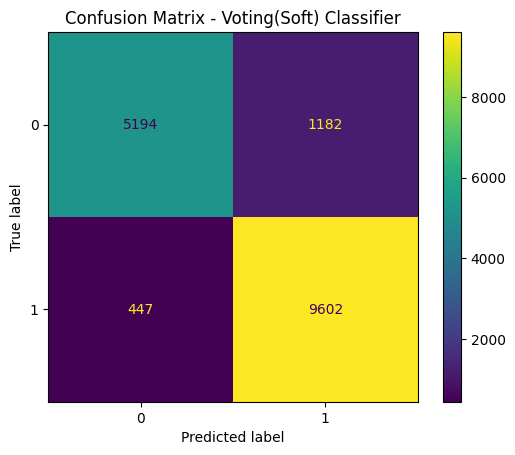

In [41]:
#voting classifier with soft voting

VC_soft = VotingClassifier(estimators = estimator_voting, voting ='soft')
VC_soft.fit(trainX, trainY["encoded_W"])
y_VC_soft = VC_soft.predict(testX)

target_names = ['Lose', 'Win']
report_soft = classification_report(testY["encoded_W"], y_VC_soft, target_names=target_names,output_dict = True)
print(classification_report(testY, y_VC_soft, target_names=target_names))

#confusion matrix
cm = confusion_matrix(testY, y_VC_soft, labels=VC_soft.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=VC_soft.classes_)
disp.plot()
plt.title("Confusion Matrix - Voting(Soft) Classifier")
plt.show()

**Cross-validation for soft voting classifier**

In [58]:
#cross-validation for soft voting classifier

# metrics wanted to collect
scoring_metrics = {
    'precision_lose': make_scorer(precision_score,pos_label=0),
    'recall_lose':  make_scorer(recall_score,pos_label=0),
    'f1_lose':  make_scorer(f1_score,pos_label=0),
    'precision_win':  make_scorer(precision_score, pos_label=1),
    'recall_win':  make_scorer(recall_score, pos_label=1),
    'f1_win':  make_scorer(f1_score, pos_label=1),
    'accuracy':make_scorer(accuracy_score)
}

# Perform cross-validation
scores = cross_validate(VC_soft, trainX, trainY["encoded_W"], cv=5, scoring=scoring_metrics, error_score='raise')

# Print out scores for each fold
results_df_soft = pd.DataFrame(scores)
results_df_soft['fold'] = results_df_soft.index + 1
results_df_soft


,fit_time,score_time,test_precision_lose,test_recall_lose,test_f1_lose,test_precision_win,test_recall_win,test_f1_win,test_accuracy,fold
0,31.201254,3.394891,0.898745,0.843641,0.870322,0.908017,0.941993,0.924693,0.904718,1
1,24.386472,3.345559,0.923077,0.793574,0.853441,0.883955,0.959641,0.920244,0.896702,2
2,26.539445,3.344550,0.885488,0.867702,0.876505,0.920271,0.931547,0.925875,0.907357,3
3,24.244454,3.431775,0.933781,0.781735,0.851020,0.878864,0.966176,0.920455,0.896286,4
4,31.412678,3.463164,0.916919,0.809855,0.860068,0.891702,0.955229,0.922373,0.900142,5


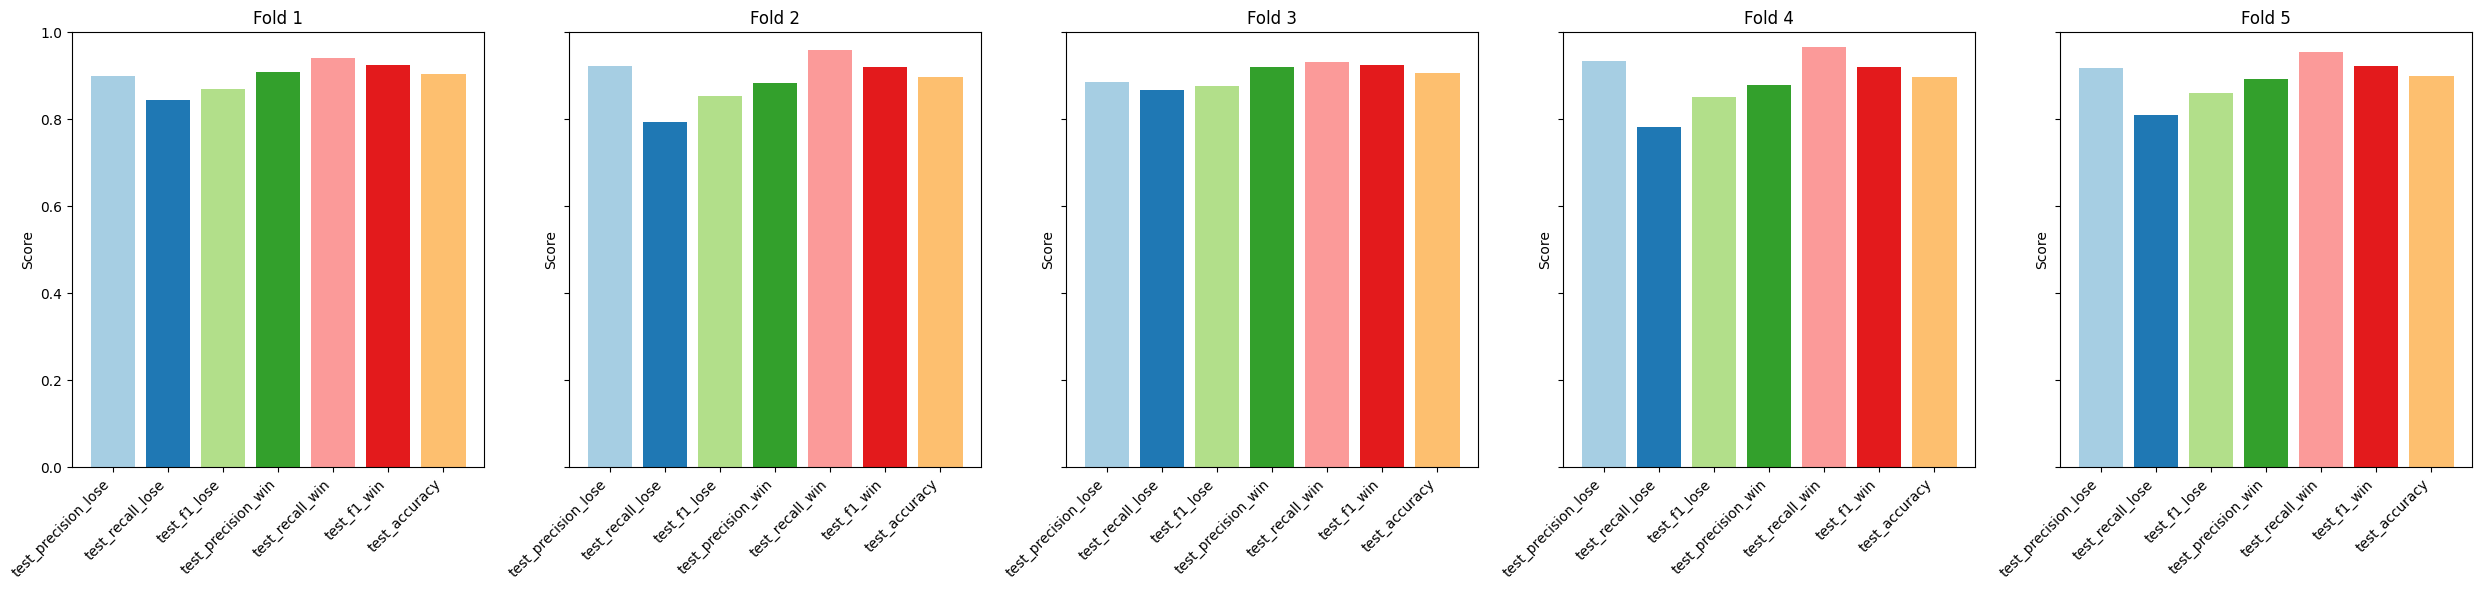

In [86]:
#visualizing cross-validation data of voting(soft) classifier

# Remove 'fit_time', 'score_time', and 'fold' columns
metrics_df = results_df_soft.drop(columns=['fit_time', 'score_time', 'fold'])

n_folds = metrics_df.shape[0]  # Number of folds
n_metrics = metrics_df.shape[1]
fig, axes = plt.subplots(nrows=1, ncols=n_folds, figsize=(n_folds * 5, 6), sharey=True)

# Loop through each fold and create a bar chart
for i in range(n_folds):
    # Get the metrics for the i-th fold (all columns for the i-th row)
    fold_metrics = metrics_df.iloc[i, :]
    axes[i].bar(fold_metrics.index, fold_metrics.values, color=plt.cm.Paired(np.arange(len(fold_metrics))))
    axes[i].set_title(f'Fold {i+1}')

    # set_xticks is set with the positions of the bars
    axes[i].set_xticks(range(len(fold_metrics)))
    axes[i].set_xticklabels(fold_metrics.index, rotation=45, ha="right")

    axes[i].set_ylim(0, 1)     # Set the y-axis limit 
    axes[i].set_ylabel('Score')
        

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


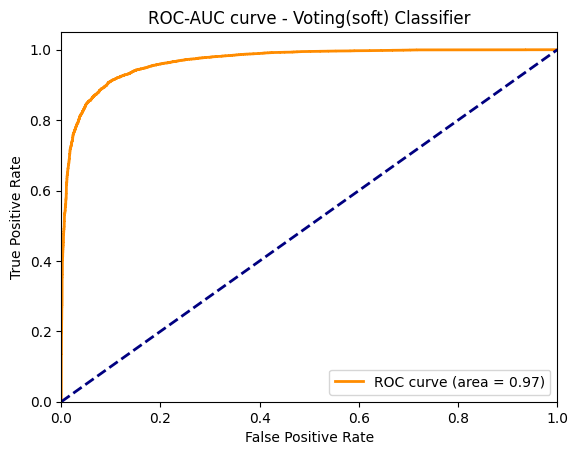

In [42]:
#ROC-AUC curve for voting(soft) classifier

# Predict probabilities for the test set
y_probs = VC_soft.predict_proba(testX)[:, 1]  # Probabilities for the positive class

# Get true binary labels and predicted probabilities
y_true = testY["encoded_W"]  

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_probs)

# Calculate the AUC (Area under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve - Voting(soft) Classifier')
plt.legend(loc="lower right")
plt.show()


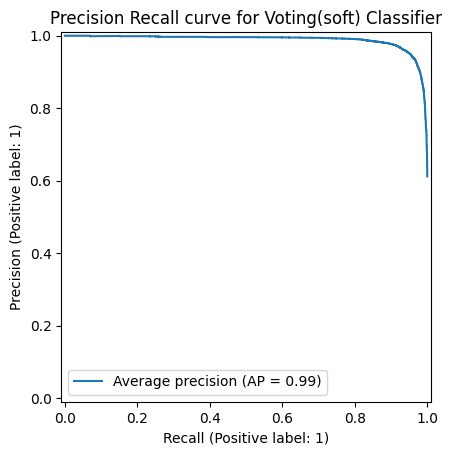

In [43]:
#Precision Recall curve for stacking classifier
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    SC, testX, testY, name="Average precision")
_ = display.ax_.set_title("Precision Recall curve for Voting(soft) Classifier")

**Comparision of Ensembles**

In [44]:
data_ensembles = {
    "Ensembles": ["Stacking Classifier","Voting(Hard) Classifier","Voting(Soft) Classifier"],
    "Accuracy": [report_stacking["accuracy"], report_hard["accuracy"], report_soft["accuracy"]],
    "Precision (Win)": [report_stacking["Win"]["precision"], report_hard["Win"]["precision"], report_soft["Win"]["precision"]],
    "Recall (Win)": [report_stacking["Win"]["recall"], report_hard["Win"]["recall"], report_soft["Win"]["recall"]],
    "F1-Score (Win)": [report_stacking["Win"]["f1-score"], report_hard["Win"]["f1-score"], report_soft["Win"]["f1-score"]],
    "Precision (Lose)": [report_stacking["Lose"]["precision"], report_hard["Lose"]["precision"], report_soft["Lose"]["precision"]],
    "Recall (Lose)": [report_stacking["Lose"]["recall"], report_hard["Lose"]["recall"], report_soft["Lose"]["recall"]],
    "F1-Score (Lose)": [report_stacking["Lose"]["f1-score"], report_hard["Lose"]["f1-score"], report_soft["Lose"]["f1-score"]],
}

comparison_ensembles = pd.DataFrame(data_ensembles)
comparison_ensembles

,Ensembles,Accuracy,Precision (Win),Recall (Win),F1-Score (Win),Precision (Lose),Recall (Lose),F1-Score (Lose)
0,Stacking Classifier,0.940335,0.949094,0.953627,0.951355,0.926359,0.919385,0.922859
1,Voting(Hard) Classifier,0.896012,0.905967,0.926162,0.915953,0.879389,0.848494,0.863665
2,Voting(Soft) Classifier,0.900822,0.890393,0.955518,0.921807,0.920759,0.814617,0.864442


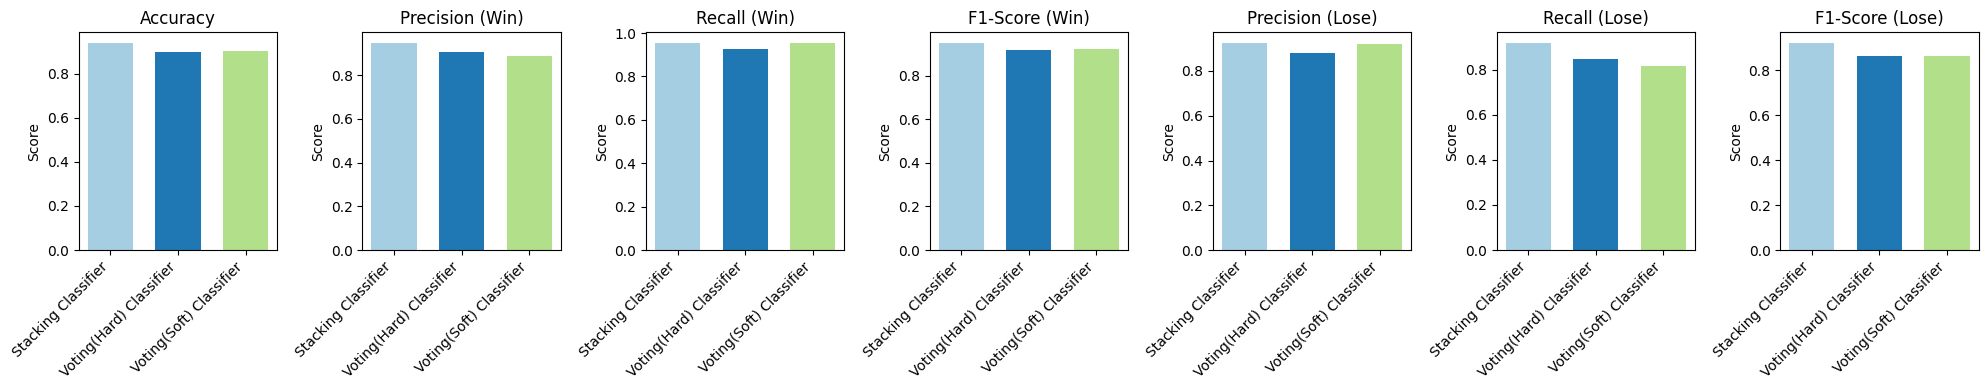

In [83]:
#Comparision plot of ensemble classifiers

# Extract ensembles and metrics from the DataFrame
classifiers = comparison_ensembles['Ensembles']
metrics = comparison_ensembles.columns[1:]  # Exclude the 'Ensembles' column

# Set up the matplotlib figure and axes in a single column
n_rows = 1
n_cols = len(metrics)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,4)) 

# Set the bar width and spacing
bar_width = 0.4  # to control bar size
group_width = 0.6  #to control space between bars

# Loop through each metric and create a bar chart
for i, metric in enumerate(metrics):
    # Positions for the groups
    r = np.arange(len(classifiers)) * group_width

    # Create bars for each classifier in a group
    axes[i].bar(r, comparison_ensembles[metric], color=plt.cm.Paired(np.arange(len(classifiers))), width=bar_width)
    axes[i].set_title(metric)
    axes[i].set_xticks(r)
    axes[i].set_xticklabels(classifiers, rotation=45, ha="right")
    axes[i].set_ylabel('Score')

# Adjust layout to prevent overlapping
fig.tight_layout()

# Show the plot
plt.show()
